##### `Factor Analysis` assumes that there are implicit features reponsible for the features of the dataset, whereas `PCA` does not. 

###### Let's compare `Factor Analysis` and `PCA`

In [1]:
from sklearn import datasets 
iris = datasets.load_iris()
iris_X = iris.data 
y = iris.target
from sklearn.decomposition import FactorAnalysis

In [2]:
factor = FactorAnalysis(n_components=2)
iris_two_dim = factor.fit_transform(iris_X)
iris_two_dim[:5]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683],
       [-1.33342439, -0.36458899]])

Text(0.5, 1.0, 'After Factor Analysis')

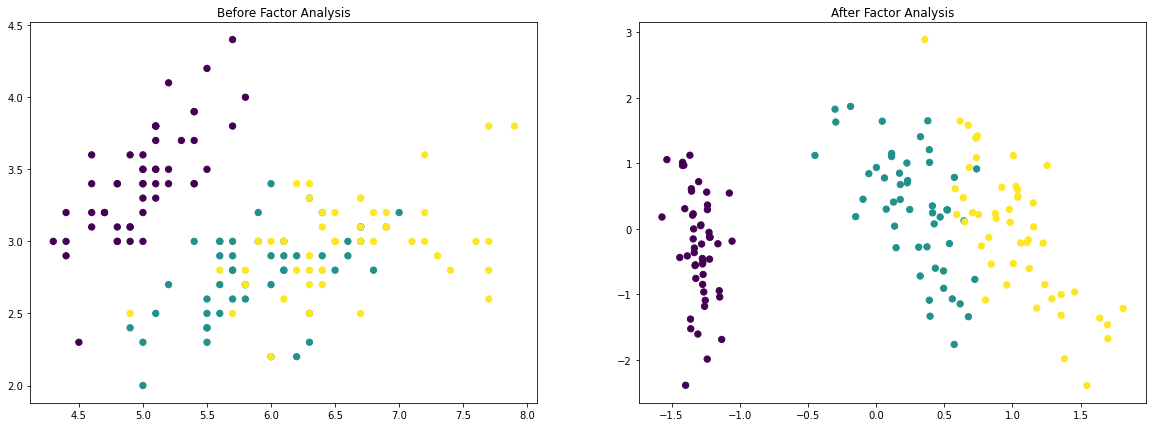

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0], iris_X[:,1],c=y,s=40)
ax.set_title("Before Factor Analysis")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_two_dim[:,0],iris_two_dim[:,1],c=y,s=40)
ax2.set_title("After Factor Analysis")

##### `PCA` is a linear transformation of the data to a different space where the first component explains the variance of the data, and each subsequent component is orthogonal to the first . 
##### `Factor Analysis` assumes that there are only `M` important features and a linear combination of these features (plus noise) creates the dataset in <i>N</i> dimensions. In other way, you don't do regression on an outcome variable, but on the features to determine the latent factors of the dataset

#### Using `Kernel PCA` for nonlinear dimensionality reduction

In [6]:
from sklearn import datasets, decomposition 
iris = datasets.load_iris()
iris_X = iris.data 
y = iris.target

#### `Cosine Kernel` works by comparing the angle between two samples represnted in the feature space, and given as: 
$cos(\theta) = \frac{A * B}{|A| |B|}$

In [7]:
kernel_pca = decomposition.KernelPCA(kernel='cosine',n_components=2)
iris_X_prime = kernel_pca.fit_transform(iris_X)

Text(0.5, 1.0, 'After Kernel (cosine) PCA')

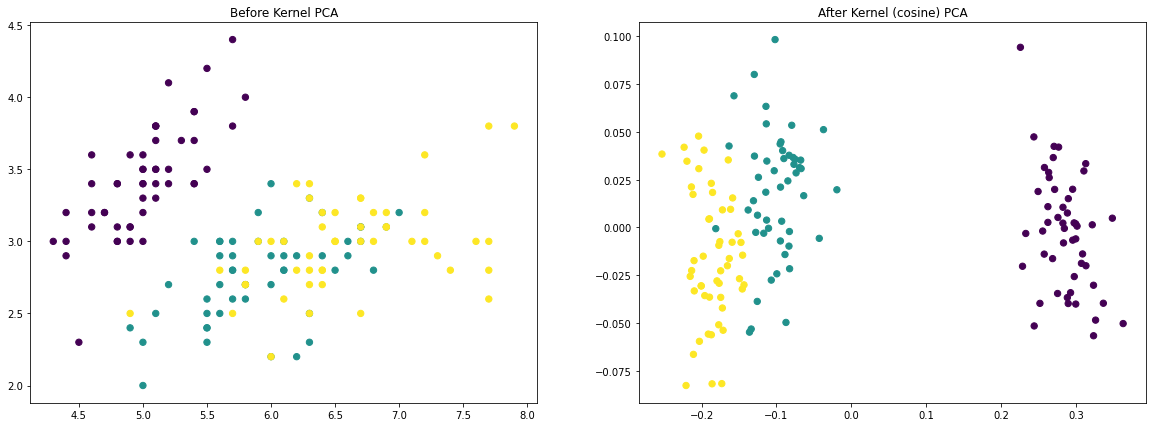

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline 

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0], iris_X[:,1],c=y,s=40)
ax.set_title("Before Kernel PCA")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_X_prime[:,0],iris_X_prime[:,1],c=y,s=40)
ax2.set_title("After Kernel (cosine) PCA")

### Using `truncated SVD` to reduce dimensionality

##### `Truncated SVD` is a matrix factorization technique that factors a matrix `M` into the three matrices $U$, $\Sigma$, and $U$. <br>
##### Factorization for `SVD` is done on the data matrix, whereas for `PCA`, the factorization is done on the covariance matrix. 
##### `Truncated SVD` can truncate number of columns
##### `Truncated SVD` can work on sparse matrices, `PCA` cannot

In [9]:
from sklearn.decomposition import TruncatedSVD 
svd = TruncatedSVD()
iris_transformed = svd.fit_transform(iris_X)


Text(0.5, 1.0, 'After Truncated SVD')

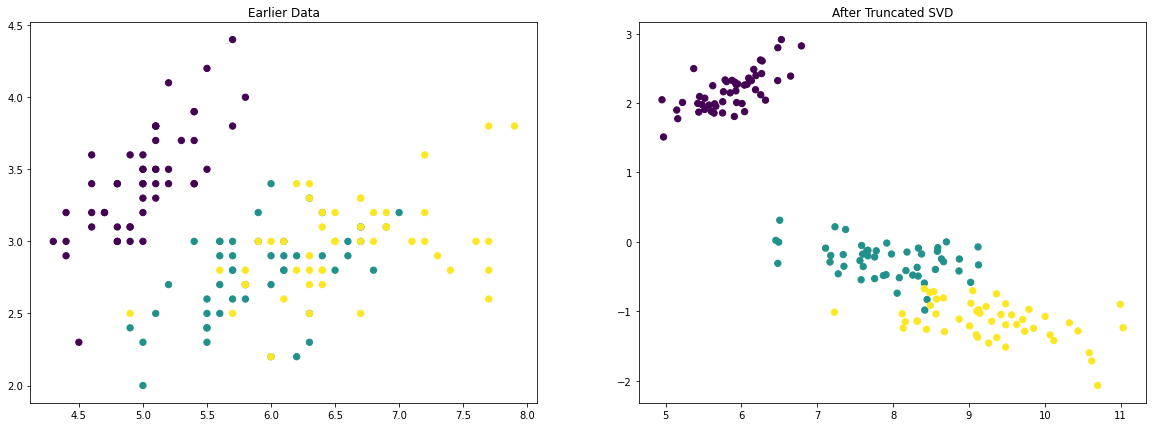

In [10]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.scatter(iris_X[:,0], iris_X[:,1],c=y,s=40)
ax.set_title("Earlier Data")

ax2 = fig.add_subplot(122)
ax2.scatter(iris_transformed[:,0],iris_transformed[:,1],c=y,s=40)
ax2.set_title("After Truncated SVD")

In [11]:
svd.explained_variance_ratio_

array([0.52875361, 0.44845576])

In [12]:
svd.explained_variance_ratio_.sum()

0.9772093692426485

#### Using decomposition to classify with `DictionaryLearning`

In [13]:
from sklearn.datasets import load_iris 
iris = load_iris()
iris_X = iris.data 
y = iris.target 

In [18]:
#Creating a training set by taking every other element of X, and y

X_train = iris_X[::2]
X_test = iris_X[1::2]
y_train = y[::2]
y_test = y[1::2]

In [15]:
from sklearn.decomposition import DictionaryLearning 

#using three components to represent the three iris species
dl = DictionaryLearning(3)

In [16]:
#Transforming every other data point 

transformed = dl.fit_transform(X_train)
transformed[:5]

array([[0.        , 6.344753  , 0.        ],
       [0.        , 5.83576099, 0.        ],
       [0.        , 6.32037564, 0.        ],
       [0.        , 5.89324204, 0.        ],
       [0.        , 5.4522191 , 0.        ]])

In [19]:
#Now testing the transform 
test_transform = dl.transform(X_test)

Text(0.5, 0.92, 'Testing Set')

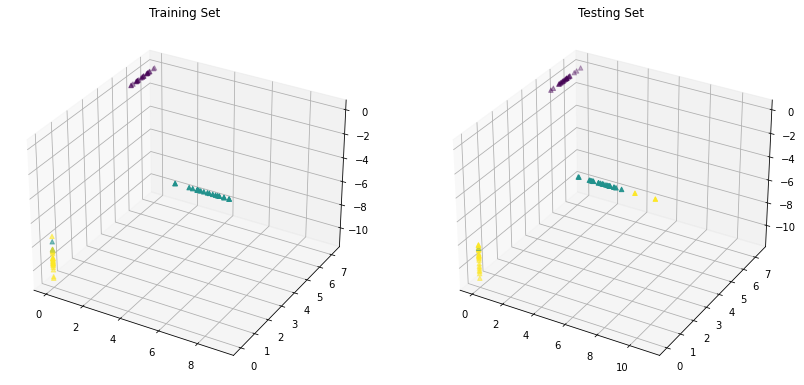

In [20]:
#Visualizing the output 

from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(transformed[:,0], transformed[:,1],transformed[:,2],c=y_train,marker='^')
ax.set_title("Training Set")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(test_transform[:,0],test_transform[:,1],test_transform[:,2],c=y_test,marker='^')
ax2.set_title("Testing Set")